In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
#from sklearn.preprocessing import MinMaxScaler

In [16]:
data = pd.read_csv('data/titanic.csv')

# Data preprocessing

In [17]:
data.head(n=10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [18]:
data.shape

(887, 8)

check for missing values

In [19]:
print(data.isna().sum())
print()
print(data.isnull().sum())

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


remove the `name` column since it is useless to us

In [20]:
data = data.drop('Name', axis=1)

encode the `sex` column

In [21]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [22]:
data['Sex'].replace(['male', 'female'], ['0', '1'], inplace=True)

In [23]:
data.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


check class imbalance

<Axes: xlabel='Survived', ylabel='Count'>

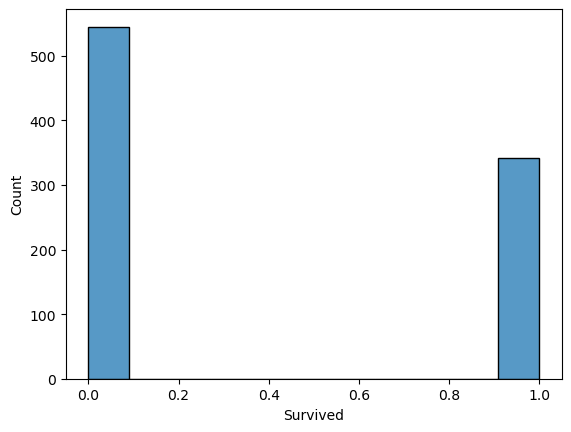

In [24]:
sns.histplot(data, x=data['Survived'])

In [25]:
print(f"Survived %: {(data[data['Survived'] == 1].shape[0] / data.shape[0]) * 100}")
print(f"Deceased %: {(data[data['Survived'] == 0].shape[0] / data.shape[0]) * 100}")

Survived %: 38.55693348365276
Deceased %: 61.44306651634723


## Data normalization

In [26]:
data.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


## Split dataset

In [27]:
from sklearn.model_selection import train_test_split

70% 15% 15%

In [35]:
y = data['Survived']
x = data[['Pclass', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']]

In [36]:
print(y.shape)
print(x.shape)

(887,)
(887, 5)


In [37]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, train_size=0.7, random_state=420)

In [38]:
print(len(x_train), len(y_train))
print(len(x_temp), len(y_temp))

620 620
267 267


In [39]:
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, train_size=0.5, random_state=420)

In [40]:
print(len(x_val), len(y_val))
print(len(x_test), len(y_test))

133 133
134 134


In [49]:
x_train.to_csv('data/train/data.csv', index=False)
y_train.to_csv('data/train/labels.csv', index=False)

x_val.to_csv('data/val/data.csv', index=False)
y_val.to_csv('data/val/labels.csv', index=False)

x_test.to_csv('data/test/data.csv', index=False)
y_test.to_csv('data/test/labels.csv', index=False)

<Axes: xlabel='Survived', ylabel='Count'>

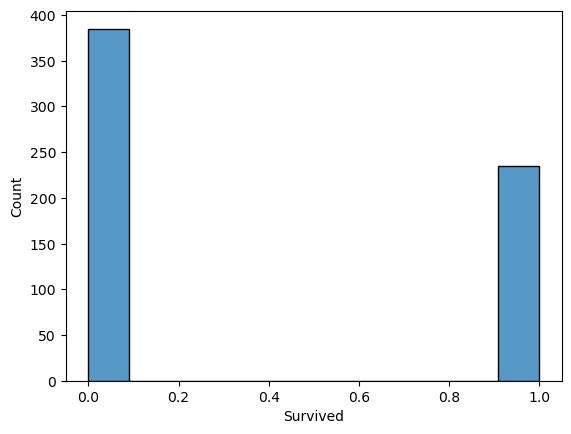

In [44]:
sns.histplot(data, x=y_train)

<Axes: xlabel='Survived', ylabel='Count'>

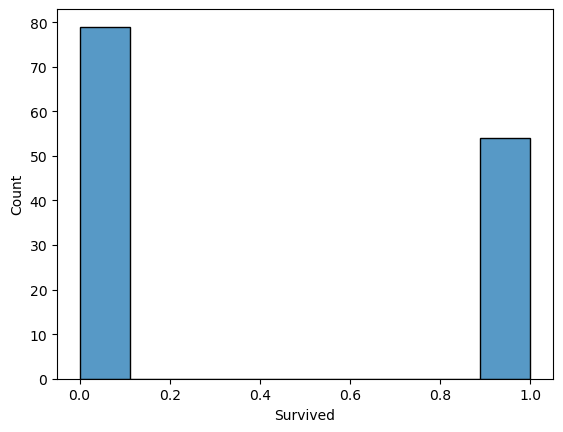

In [45]:
sns.histplot(data, x=y_val)

<Axes: xlabel='Survived', ylabel='Count'>

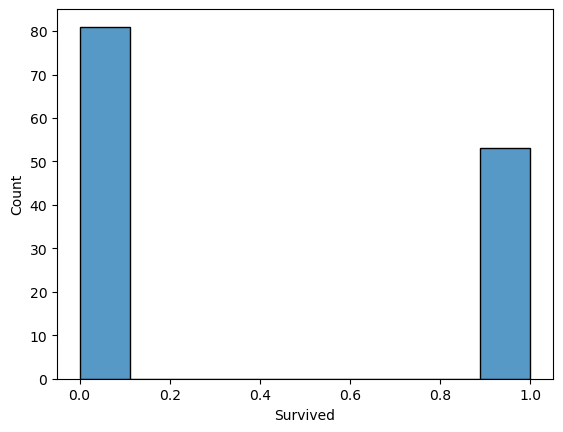

In [46]:
sns.histplot(data, x=y_test)

# Playground

In [122]:
print(data['Parents/Children Aboard'].sort_values().unique())
print(data['Siblings/Spouses Aboard'].sort_values().unique())

[0 1 2 3 4 5 6]
[0 1 2 3 4 5 8]


In [125]:
data[data['Siblings/Spouses Aboard'] == 8]

     Survived  Pclass                         Name     Sex   Age  \
158         0       3    Master. Thomas Henry Sage    male   5.0   
179         0       3  Miss. Constance Gladys Sage  female   8.0   
200         0       3           Mr. Frederick Sage    male  17.0   
322         0       3      Mr. George John Jr Sage    male  20.0   
788         0       3       Miss. Stella Anna Sage  female  21.0   
842         0       3      Mr. Douglas Bullen Sage    male  18.0   
859         0       3     Miss. Dorothy Edith Sage  female  14.0   

     Siblings/Spouses Aboard  Parents/Children Aboard   Fare  
158                        8                        2  69.55  
179                        8                        2  69.55  
200                        8                        2  69.55  
322                        8                        2  69.55  
788                        8                        2  69.55  
842                        8                        2  69.55  
859           

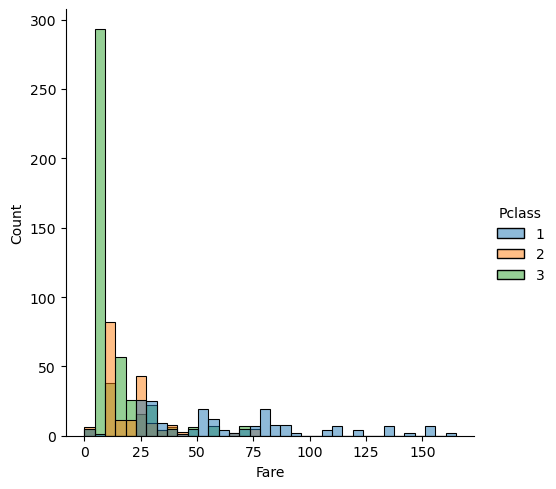

In [118]:
sns.displot(data, x='Fare', hue='Pclass', palette=sns.color_palette(n_colors=3))

#### Skalovanie hodnot stlpca 'Fare' do rozsahu (0, 1)

In [86]:
data['Fare'].describe()

count    887.00000
mean      32.30542
std       49.78204
min        0.00000
25%        7.92500
50%       14.45420
75%       31.13750
max      512.32920
Name: Fare, dtype: float64

<Axes: xlabel='Fare', ylabel='Density'>

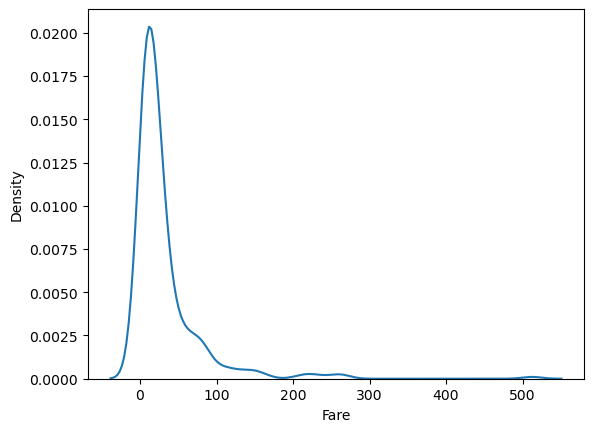

In [87]:
sns.kdeplot(data['Fare'])

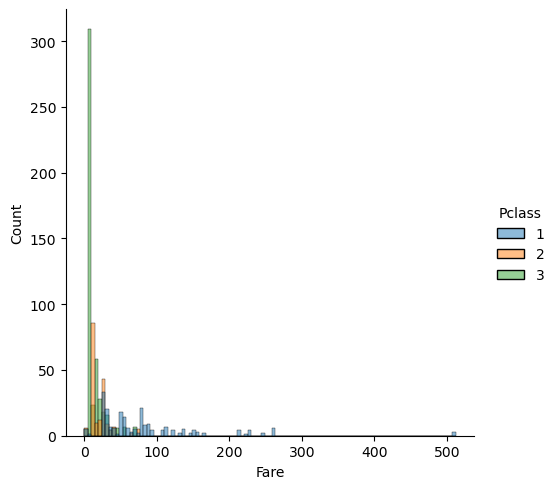

In [88]:
sns.displot(data, x='Fare', hue='Pclass', palette=sns.color_palette(n_colors=3))

In [89]:
data['Fare'].sort_values().tail(10)

117    247.5208
738    262.3750
309    262.3750
435    263.0000
87     263.0000
27     263.0000
339    263.0000
733    512.3292
257    512.3292
676    512.3292
Name: Fare, dtype: float64

In [90]:
data = data[data['Fare'] < 500]

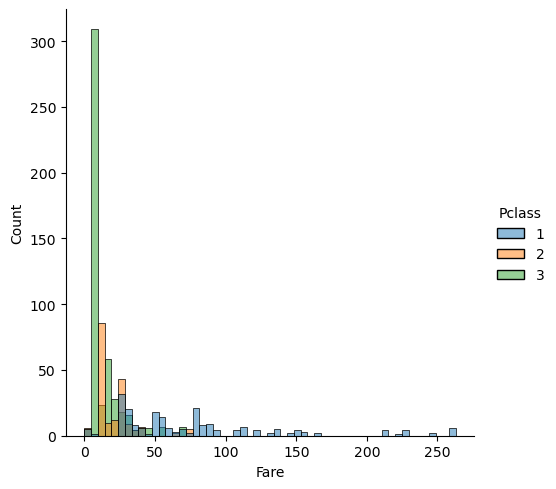

In [91]:
sns.displot(data, x='Fare', hue='Pclass', palette=sns.color_palette(n_colors=3))

In [92]:
scaler = MinMaxScaler()
data['Fare'] = scaler.fit_transform(data['Fare'].values.reshape(-1,1))

In [93]:
data['Fare'].describe()

count    884.000000
mean       0.116640
std        0.156825
min        0.000000
25%        0.030133
50%        0.054959
75%        0.117871
max        1.000000
Name: Fare, dtype: float64

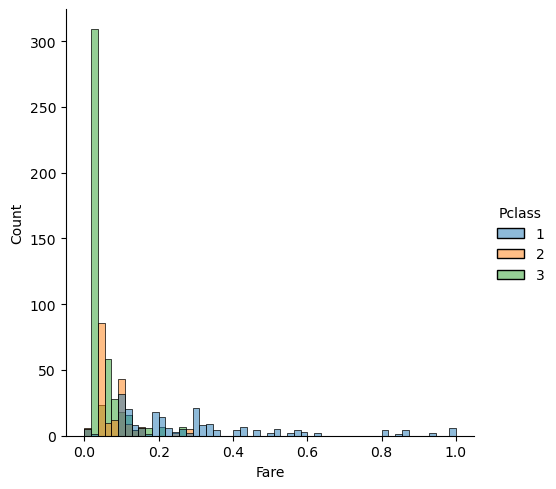

In [94]:
sns.displot(data, x='Fare', hue='Pclass', palette=sns.color_palette(n_colors=3))

#### Normalizacia stlpca 'Fare' pomocou mean a variance 

In [111]:
fare_mean = data['Fare'].mean()
fare_variance = data['Fare'].var()

print(f"mean: {fare_mean}")
print(f"variance: {fare_variance}")

mean: 32.30542018038331
variance: 2478.2515464045464


In [112]:
data['Fare'] = data['Fare'] - fare_mean
data['Fare'] = data['Fare'] / fare_variance

In [113]:
fare_mean = data['Fare'].mean()
fare_variance = data['Fare'].var()

print(f"mean: {fare_mean}")
print(f"variance: {fare_variance}")

mean: 2.5033213633036223e-18
variance: 0.0004035102899262997


<Axes: xlabel='Fare', ylabel='Density'>

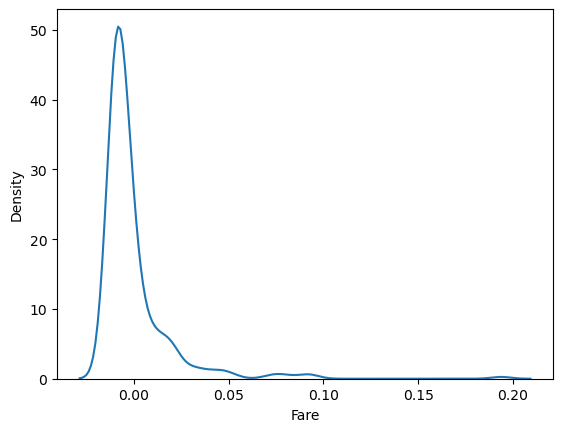

In [114]:
sns.kdeplot(data['Fare'])

## Zobrazenie dat po ukonceni predspracovania

In [95]:
data.head(10)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,0,22.0,1,0,0.027567
1,1,1,1,38.0,1,0,0.271039
2,1,3,1,26.0,0,0,0.030133
3,1,1,1,35.0,1,0,0.201901
4,0,3,0,35.0,0,0,0.030608
5,0,3,0,27.0,0,0,0.032161
6,0,1,0,54.0,0,0,0.197196
7,0,3,0,2.0,3,1,0.080133
8,1,3,1,27.0,0,2,0.042332
9,1,2,1,14.0,1,0,0.114338
